['全员恶玉', '在魔王城说晚安', '咒术回战', '熊熊勇闯异世界', '你与我最后的战场，亦或是世界起始的圣战', '总之就是非常可爱', '魔女之旅', '约战狂三外传', 'One Room 第三季', '鬼灭之刃（中配）', '黑色四叶草', '无能力者娜娜', '突击莉莉 BOUQUET', '忧国的莫里亚蒂', '我立于百万生命之上', '在地下城寻求邂逅是否搞错了什么 第三季', '鬼灭之刃', '成神之日', '被神捡到的男人', '黄金神威 第三季', '关于我转生变成史莱姆这档事', '炎炎消防队 贰之章', 'OVERLORD', 'OVERLORD Ⅱ', 'OVERLORD Ⅲ', '博人传 火影忍者新时代', '请问您今天要来点兔子吗？BLOOM', '小碧蓝幻想！', '光之战记－ZUERST－', '小林家的龙女仆', '池袋西口公园', '半妖的夜叉姬', 'JOJO的奇妙冒险 黄金之风', '体操武士', '催眠麦克风-Division Rap Battle- Rhyme Anima', 'Love Live！虹咲学园学园偶像同好会', '名侦探柯南', '满溢的水果挞', '炎炎消防队', '工作细胞', '碧蓝之海', '战翼的希格德莉法', 'Ｄｒ．ＳＴＯＮＥ 石纪元', '约定的梦幻岛', '月歌。THE ANIMATION2', '辉夜大小姐想让我告白？～天才们的恋爱头脑战～', '精灵宝可梦 日月', '青春猪头少年不会梦到兔女郎学姐']
[7333.8, 4145.8, 16000.0, 2814.2, 3422.5, 9468.8, 4156.9, 1233.2, 1027.0, 7404.3, 17000.0, 2243.4, 849.4, 1274.1, 3083.9, 2283.6, 58000.0, 3465.8, 2860.4, 430.1, 30000.0, 4641.5, 31000.0, 29000.0, 30000.0, 21000.0, 850.5, 185.8, 204.9, 24000.0, 431.9, 1958.6, 33000.0, 253.1, 855.0, 361.4, 18000.0, 259.2, 8334.0, 18000.0, 8410.6, 402.1, 11000

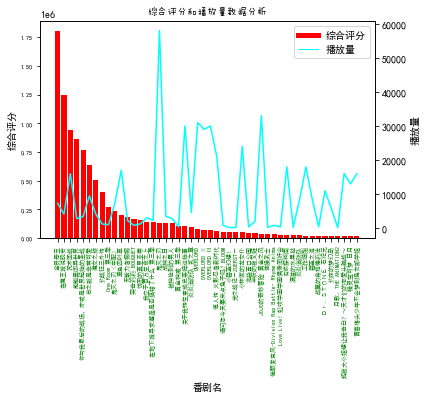

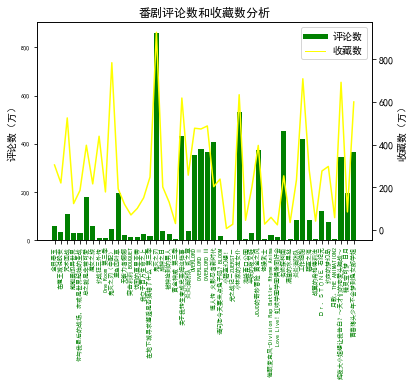

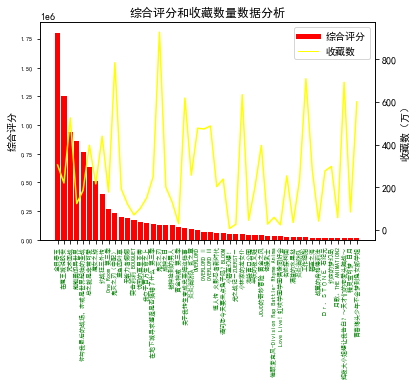

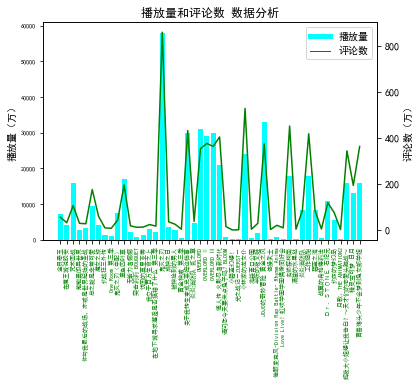

In [5]:
import re
import pandas
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib import font_manager


def get_html(url):
    try:
        r = requests.get(url)  # 使用get来获取网页数据
        r.raise_for_status()  # 如果返回参数不为200，抛出异常
        r.encoding = r.apparent_encoding  # 获取网页编码方式
        return r.text  # 返回获取的内容
    except:
        return '错误'


def save(html):
    # 解析网页
    soup = BeautifulSoup(html, 'html.parser')  # 指定Beautiful的解析器为“html.parser”

    with open('B_data.txt', 'r+', encoding='UTF-8') as f:
        f.write(soup.text)

    # 定义好相关列表准备存储相关信息
    TScore = []  # 综合评分
    name = []  # 动漫名字
    bfl = []  # 播放量
    pls = []  # 评论数
    scs = []  # 收藏数

    # ********************************************  动漫名字存储
    for tag in soup.find_all('div', class_='info'):
        # print(tag)
        bf = tag.a.string
        name.append(str(bf))
    print(name)

    # ********************************************  播放量存储
    for tag in soup.find_all('div', class_='detail'):
        # print(tag)
        bf = tag.find('span', class_='data-box').get_text()
        # 统一单位为‘万’
        if '亿' in bf:
            num = float(re.search(r'\d(.\d)?', bf).group()) * 10000
            # print(num)
            bf = num
        else:
            bf = re.search(r'\d*(\.)?\d', bf).group()
        bfl.append(float(bf))
    print(bfl)
    # ********************************************  评论数存储
    for tag in soup.find_all('div', class_='detail'):
        # pl = tag.span.next_sibling.next_sibling
        pl = tag.find('span', class_='data-box').next_sibling.next_sibling.get_text()
        # *********统一单位
        if '万' not in pl:
            pl = '%.1f' % (float(pl) / 10000)
            # print(123, pl)
        else:
            pl = re.search(r'\d*(\.)?\d', pl).group()
        pls.append(float(pl))
    print(pls)
    # ********************************************  收藏数
    for tag in soup.find_all('div', class_='detail'):
        sc = tag.find('span', class_='data-box').next_sibling.next_sibling.next_sibling.next_sibling.get_text()
        sc = re.search(r'\d*(\.)?\d', sc).group()
        scs.append(float(sc))
    print(scs)
    # ********************************************  综合评分
    for tag in soup.find_all('div', class_='pts'):
        zh = tag.find('div').get_text()
        TScore.append(int(zh))
    print('综合评分', TScore)

    # 存储至excel表格中
    info = {'动漫名': name, '播放量(万)': bfl, '评论数(万)': pls, '收藏数(万)': scs, '综合评分': TScore}
    dm_file = pandas.DataFrame(info)
    dm_file.to_excel('Dongman.xlsx', sheet_name="动漫数据分析")
    # 将所有列表返回
    return name, bfl, pls, scs, TScore


def view(info):
    my_font = font_manager.FontProperties(fname='C:\Windows\Fonts\方正喵呜体.ttf')  # 设置中文字体（图标中能显示中文）
    dm_name = info[0]  # 番剧名
    dm_play = info[1]  # 番剧播放量
    dm_review = info[2]  # 番剧评论数
    dm_favorite = info[3]  # 番剧收藏数
    dm_com_score = info[4]  # 番剧综合评分
    # print(dm_com_score)

    # 为了坐标轴上能显示中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    # **********************************************************************综合评分和播放量对比
    # *******综合评分条形图
    fig, ax1 = plt.subplots()
    plt.bar(dm_name, dm_com_score, color='red')  #设置柱状图
    plt.title('综合评分和播放量数据分析', fontproperties=my_font)  # 表标题
    ax1.tick_params(labelsize=6)
    plt.xlabel('番剧名')  # 横轴名
    plt.ylabel('综合评分')  # 纵轴名
    plt.xticks(rotation=90, color='green')  # 设置横坐标变量名旋转度数和颜色

    # *******播放量折线图
    ax2 = ax1.twinx()  # 组合图必须加这个
    ax2.plot(dm_play, color='cyan')  # 设置线粗细，节点样式
    plt.ylabel('播放量')  # y轴

    plt.plot(1, label='综合评分', color="red", linewidth=5.0)  # 图例
    plt.plot(1, label='播放量', color="cyan", linewidth=1.0, linestyle="-")  # 图例
    plt.legend()

    plt.savefig(r'E:1.png', dpi=1000, bbox_inches='tight')  #保存至本地

    # plt.show()

    # **********************************************************************评论数和收藏数对比
    # ********评论数条形图
    fig, ax3 = plt.subplots()
    plt.bar(dm_name, dm_review, color='green')
    plt.title('番剧评论数和收藏数分析')
    plt.ylabel('评论数（万）')
    ax3.tick_params(labelsize=6)
    plt.xticks(rotation=90, color='green')

    # *******收藏数折线图
    ax4 = ax3.twinx()  # 组合图必须加这个
    ax4.plot(dm_favorite, color='yellow')  # 设置线粗细，节点样式
    plt.ylabel('收藏数（万）')

    plt.plot(1, label='评论数', color="green", linewidth=5.0)
    plt.plot(1, label='收藏数', color="yellow", linewidth=1.0, linestyle="-")
    plt.legend()
    plt.savefig(r'E:2.png', dpi=1000, bbox_inches='tight')

    # **********************************************************************综合评分和收藏数对比
    # *******综合评分条形图
    fig, ax5 = plt.subplots()
    plt.bar(dm_name, dm_com_score, color='red')
    plt.title('综合评分和收藏数量数据分析')
    plt.ylabel('综合评分')
    ax5.tick_params(labelsize=6)
    plt.xticks(rotation=90, color='green')

    # *******收藏折线图
    ax6 = ax5.twinx()  # 组合图必须加这个
    ax6.plot(dm_favorite, color='yellow')  # 设置线粗细，节点样式
    plt.ylabel('收藏数（万）')
    plt.plot(1, label='综合评分', color="red", linewidth=5.0)
    plt.plot(1, label='收藏数', color="yellow", linewidth=1.0, linestyle="-")
    plt.legend()

    plt.savefig(r'E:3.png', dpi=1000, bbox_inches='tight')

    # **********************************************************************播放量和评论数对比
    # *******播放量条形图
    fig, ax7 = plt.subplots()
    plt.bar(dm_name, dm_play, color='cyan')
    plt.title('播放量和评论数 数据分析')
    plt.ylabel('播放量（万）')
    ax7.tick_params(labelsize=6)
    plt.xticks(rotation=90, color='green')

    # *******评论数折线图
    ax8 = ax7.twinx()  # 组合图必须加这个
    ax8.plot(dm_review, color='green')  # 设置线粗细，节点样式
    plt.ylabel('评论数（万）')
    plt.plot(1, label='播放量', color="cyan", linewidth=5.0)
    plt.plot(1, label='评论数', color="green", linewidth=1.0, linestyle="-")
    plt.legend()
    plt.savefig(r'E:4.png', dpi=1000, bbox_inches='tight')

    plt.show()


def main():
    url = 'https://www.bilibili.com/v/popular/rank/bangumi'  # 网址
    html = get_html(url)  # 获取返回值
    # print(html)
    info = save(html)
    view(info)


if __name__ == '__main__':
    main()
